In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('//content/gdrive/MyDrive/Classroom/dta_original_Normalizer.tsv)

SyntaxError: ignored

Se cargan los datos, los cuales fueron enriquesidos con datos sinteticos :

In [ ]:
data2017=pd.read_csv("/content/dta_enriched_QuantileTransformer.tsv",sep="\t")

In [ ]:
print("Keys of iris_dataset: \n{}".format(data2017.keys()))

Keys of iris_dataset: 
Index(['OTU ID', 'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_01',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_02',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_03',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_04',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_05',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_06',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_07',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_08',
       'SMOTE_MetaSUB_gCSD16_gCSD16_AKL_09',
       ...
       'SMOTE_MetaSUB_gCSD16_gCSD17_VIE_25',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_17',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_18',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_19',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_20',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_21',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_22',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_23',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_24',
       'SMOTE_MetaSUB_gCSD16_gCSD17_ZRH_25'],
      dtype='object', length=426)


Se cargan las etiquetas  de nuestros datos cuales  las cuales son las ciudades


In [ ]:
ciudad=[0]
for i in data2017.keys()[1:]:
  ciudad.append("_".join(i.split("_")[-3:-1]))
print(ciudad)
print(len(ciudad))


[0, 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'g

(18290, 426)

In [ ]:
# impoting or loading the dataset

 
# distributing the dataset into two components X and Y
# distributing the dataset into two components X and Y
X = data2017.iloc[:, :].values
y = ciudad
X=np.transpose (X)
print(len(y), X.shape)

426 (426, 18290)


# **SKNN**

In [ ]:
# se llama  el metodo skkn y se entrena
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 0)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.fit(X_test,y_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: KNeighborsClassifier(n_neighbors=11)
Test set accuracy: 0.61


En seguida se cargan diferentes datos normalizados tanto originales y enrequecidos, se entrena el algoritmo Knn  variando el numero de  vecinos y se grafica la presición 


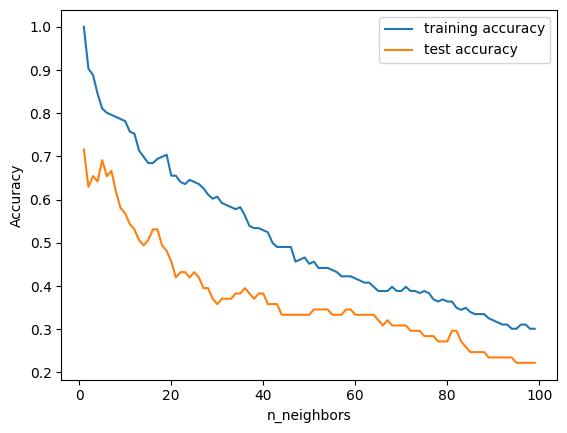

In [ ]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,100)
for n_neighbors in neighbors_settings:
  # build the model
  clf =   clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'minkowski', p = 1)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

[0, 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'g

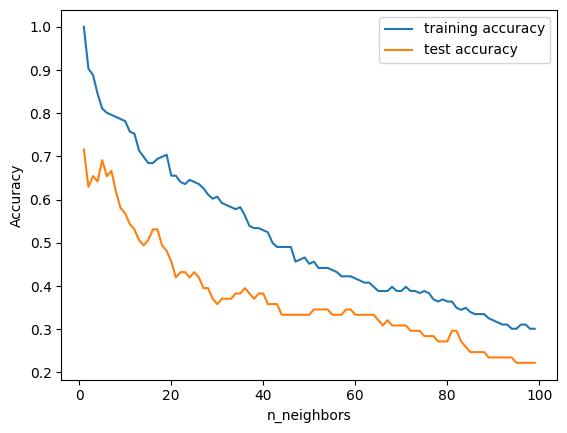

In [ ]:
data2017=pd.read_csv("/content/dta_original_QuantileTransformer.tsv",sep="\t")
ciudad=[0]
for i in data2017.keys()[1:]:
  ciudad.append("_".join(i.split("_")[-3:-1]))
print(ciudad)
print(len(ciudad))
data2017.shape
# impoting or loading the dataset

 
# distributing the dataset into two components X and Y
# distributing the dataset into two components X and Y
X = data2017.iloc[:, :].values
y = ciudad
X=np.transpose (X)
print(len(y), X.shape)
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 0)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,100)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'minkowski', p = 1)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


[0, 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'g

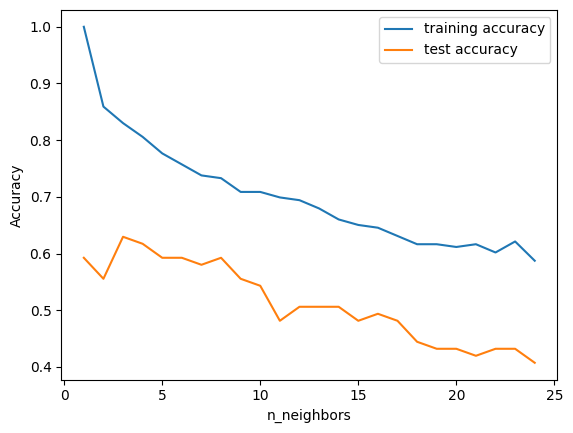

In [ ]:
data2017=pd.read_csv("/content/dta_original_PowerTransformer.tsv",sep="\t")
ciudad=[0]
for i in data2017.keys()[1:]:
  ciudad.append("_".join(i.split("_")[-3:-1]))
print(ciudad)
print(len(ciudad))
data2017.shape
# impoting or loading the dataset

 
# distributing the dataset into two components X and Y
# distributing the dataset into two components X and Y
X = data2017.iloc[:, :].values
y = ciudad
X=np.transpose (X)
print(len(y), X.shape)
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 0)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,25)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'minkowski', p = 1)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


[0, 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_AKL', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_BER', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DEN', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_DOH', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'gCSD16_LIS', 'g

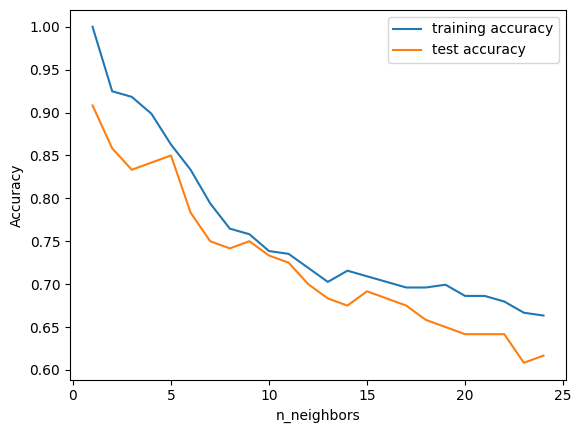

In [ ]:
data2017=pd.read_csv( "/content/dta_enriched_PowerTransformer.tsv" ,sep="\t")
ciudad=[0]
for i in data2017.keys()[1:]:
  ciudad.append("_".join(i.split("_")[-3:-1]))
print(ciudad)
print(len(ciudad))
data2017.shape
# impoting or loading the dataset

 
# distributing the dataset into two components X and Y
# distributing the dataset into two components X and Y
X = data2017.iloc[:, :].values
y = ciudad
X=np.transpose (X)
print(len(y), X.shape)
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 0)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,25)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'minkowski', p = 1)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


Nos dimos cuenta que los datos enriquecidos se comportaban demaciado bien y por ende se penso en dejó este camino por la sospecha de que se estaba metiendo coorelación 
